SCC0270 - Redes Neurais e Aprendizado Profundo

Alunos:
- 10716504 - Helbert Moreira Pinto
- 10377708 - João Marcos Della Torre Divino

Exercicio 2 - Implemente uma rede MLP usando apenas pacotes básicos do Python, como a biblioteca Numpy.

No exercÍcio anterior implementamos o perceptron que consegue encontrar um plano separador entre dois conjuntos, desde que os elementos dos conjuntos sejam linearmente separáveis.  
Vemos abaixo duas associações de conjuntos. Na primeira temos conjuntos linearmente separáveis (existe um plano separador entre eles) e na segunda não temos um plano que separe ambos conjuntos.   
<img src='imgs/separaveis.png' alt='Linearmente separável' width='1000'/>

Como a maioria dos problemas reais exigem soluções não linearmente separaveis, temos uma limitação considerável no uso do perceptron.  
Como exemplo podemos citar o problema do XOR (Exclusive OR) que possui a seguinte tabela verdade:

| A | B | S |
|:-:|:-:|:-:|
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Para uma melhor comparação, vemos graficamente lado a lado como são os casos do AND, do OR e do XOR:  
<img src='imgs/xor2.png' alt='Linearmente separável' width='500'/>


Para a solução deste problema, foi proposto a construção de uma rede de perceptrons, onde a saída dos perceptrons da camada atual alimenta os perceptrons de camadas posteriores, conhecido por MLP (MultiLayer Perceptron). A cada camada de processamento da rede é adicionado um novo plano separador dos conjuntos, resolvendo deste modo problemas que não são linearmente separaveis.  
<img src='imgs/mlp.png' alt='Linearmente separável' width='500'/>

Diferentemente do perceptron simples, onde o erro da saída estava diretamente relacionado aos pesos do próprio perceptron, no MLP o erro da saída é indiretamente influenciado por uma pequena parcela de todos os neurônios que compõe a rede. Deste modo o ajuste dos pesos deve ser feito da camada de saída (onde o erro pode ser mensurado) para as camadas anteriores. O nome deste processo de retropropagação do erro é conhecida por backpropagation.

O algoritmo de backpropagation é baseado na ideia de ajustes dos pesos na direção de minimização da função de custo (que neste caso é a saida esperada - saida observada). Para encontrar a direção de minimização da função de custo usa-se o gradiente descendente, como pode ser visto na figura abaixo.  
<img src='imgs/gradiente.png' alt='Linearmente separável' width='500'/>

Em nossa implementação utilizamos a regra delta para calcularmos os gradientes dos pesos:

$\delta_0 = erro \cdot \frac {d} {dx} fa(A_n)$

$\delta_i = \delta_{i-1} \cdot W^{T}_{i} \cdot \frac {d} {dx} fa(A_{i}), i = 1, 2, 3, ... , n-1$

onde:

$fa$ = função de ativação (sigmóide)

$W_i$ = pesos da camada i

$A_i$ = vetor de saída da camada i 

Após os calculos dos deltas, os gradientes podem ser calculados como:

$\nabla W_i = \delta_{n-i} \cdot A_i, i = 0,1,2,...,n$

Para treino da nossa rede, utilizamos o algoritmo conforme imagem abaixo.

<img src='imgs/treino-mlp.png' alt='Linearmente separável' width='500'/>

In [1]:
xor = [
    ([0,0], [1]), 
    ([0,1], [0]), 
    ([1,0], [0]), 
    ([1,1], [1]), 
]

In [2]:
from src.mlp import MLP
rede = MLP([2,2,1])

In [3]:
for x, _ in xor:
    y, _ = rede.feedforward(x)
    print(x, y)

[0, 0] [[0.51445764]]
[0, 1] [[0.5270065]]
[1, 0] [[0.48943658]]
[1, 1] [[0.50315985]]


In [4]:
arr_erro = rede.treino(amostras=xor, taxa=0.5, lim_epocas=10000)

Epoca: 00000 | MSE: 0.26591543
Epoca: 00500 | MSE: 0.23371341
Epoca: 01000 | MSE: 0.06516581
Epoca: 01500 | MSE: 0.01219228
Epoca: 02000 | MSE: 0.00605306
Epoca: 02500 | MSE: 0.00392664
Epoca: 03000 | MSE: 0.00287625
Epoca: 03500 | MSE: 0.00225718
Epoca: 04000 | MSE: 0.00185153
Epoca: 04500 | MSE: 0.00156623
Epoca: 05000 | MSE: 0.00135518
Epoca: 05500 | MSE: 0.00119301
Epoca: 06000 | MSE: 0.00106467
Epoca: 06500 | MSE: 0.00096068
Epoca: 07000 | MSE: 0.00087477
Epoca: 07500 | MSE: 0.00080265
Epoca: 08000 | MSE: 0.00074128
Epoca: 08500 | MSE: 0.00068845
Epoca: 09000 | MSE: 0.00064249
Epoca: 09500 | MSE: 0.00060218


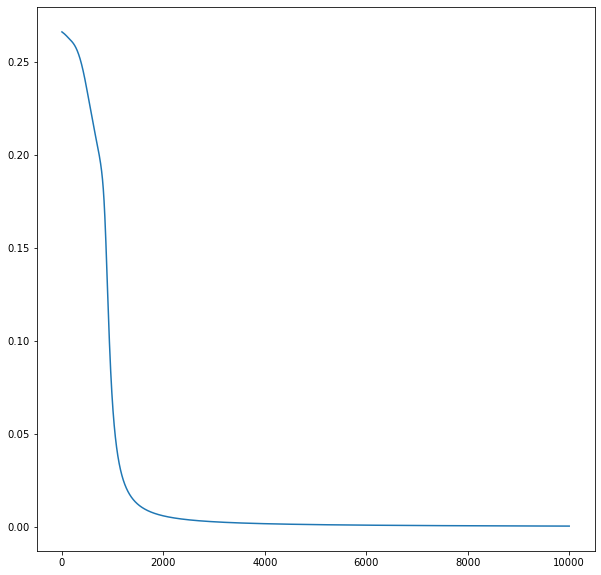

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(arr_erro)
plt.show()

In [6]:
for x, _ in xor:
    y, _ = rede.feedforward(x)
    print(x, y)

[0, 0] [[0.97465799]]
[0, 1] [[0.02183365]]
[1, 0] [[0.02185161]]
[1, 1] [[0.97415103]]
